In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.filters import hp_filter

In [2]:
!pip install prophet

  Using cached cmdstanpy-1.1.0-py3-none-any.whl (83 kB)
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [3]:
!pip install fbprophet


  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [45 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib
      creating build/lib/fbprophet
      creating build/lib/fbprophet/stan_model
      matplotlib data path: /usr/local/lib64/python3.9/site-packages/matplotlib/mpl-data
      CONFIGDIR=/root/.config/matplotlib
      interactive is False
      platform is linux
      CACHEDIR=/root/.cache/matplotlib
      Using fontManager instance from /root/.cache/matplotlib/fontlist-v330.json
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-g20fqllp/fbprophet_7c7e7e136742454cbbdb

Failed to build fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.1.0
    Uninstalling cmdstanpy-1.1.0:
      Successfully uninstalled cmdstanpy-1.1.0
  Running setup.py install for fbprophet ... error
  error: subprocess-exited-with-error
  
  × Running setup.py install for fbprophet did not run successfully.
  │ exit code: 1
  ╰─> [41 lines of output]
      running install
      running build
      running build_py
      creating build
      creating build/lib
      creating build/lib/fbprophet
      creating build/lib/fbprophet/stan_model
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-g20fqllp/fbprophet_7c7e7e136742454cbbdbb9a336d3ef05/setup.py", line 122, in <module>
          setup(
        File "/usr/lib/python3.9/site-packages/setuptools/__init__.py", line 153, in setup
          return distutils.core.setup(**at

In [4]:
from prophet import Prophet


In [5]:
df=pd.read_csv("NSE_BANKING_SECTOR.csv")
df

,DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE
0,2016-01-01,HDFC,EQ,1263.75,1261.00,1266.90,1250.65,1257.80,1258.45,1258.39,676161,8.508751e+13,13230,308262,0.4559
1,2016-01-04,HDFC,EQ,1258.45,1250.00,1253.90,1212.05,1217.15,1216.70,1227.55,1995329,2.449371e+14,78529,1360507,0.6818
2,2016-01-05,HDFC,EQ,1216.70,1229.90,1233.45,1206.50,1208.15,1209.40,1219.50,2325929,2.836464e+14,109820,1644980,0.7072
3,2016-01-06,HDFC,EQ,1209.40,1209.60,1220.75,1202.40,1207.55,1209.30,1210.81,2746330,3.325286e+14,96546,2001431,0.7288
4,2016-01-07,HDFC,EQ,1209.30,1198.85,1203.55,1175.00,1176.35,1179.45,1186.35,1780298,2.112055e+14,60151,1172564,0.6586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41226,2021-05-24,DHANBANK,EQ,14.30,14.40,14.70,14.35,14.55,14.55,14.52,1020364,1.481694e+12,1323,745223,0.7304
41227,2021-05-25,DHANBANK,EQ,14.55,14.60,17.45,14.40,16.55,16.60,16.67,16401581,2.734927e+13,15379,4777890,0.2913
41228,2021-05-26,DHANBANK,EQ,16.60,16.75,16.75,15.80,15.95,15.95,16.06,2267386,3.642436e+12,4812,1223263,0.5395
41229,2021-05-27,DHANBANK,EQ,15.95,15.95,16.10,15.35,15.75,15.60,15.74,1411225,2.221628e+12,2820,904246,0.6408


Prev Close: Last day close point

Open: current day open point

High: current day highest point

Low: current day lowest point

Last: the final quoted trading price for a particular stock, or stock-market index, during the most recent day of trading.

Close: Closing point for the current day

VWAP: volume-weighted average price is the ratio of the value traded to total volume traded over a particular time horizon

Volume: the amount of a security that was traded during a given period of time. For every buyer, there is a seller, and each transaction contributes to the count of total volume.

Turnover: Total Turnover of the stock till that day

Trades: Number of buy or Sell of the stock.

Deliverable: Volumethe quantity of shares which actually move from one set of people (who had those shares in their demat account before today and are selling today) to another set of people (who have purchased those shares and will get those shares by T+2 days in their demat account).

%Deliverble: percentage deliverables of that stock



In [6]:
df.head()

,DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE
0,2016-01-01,HDFC,EQ,1263.75,1261.00,1266.90,1250.65,1257.80,1258.45,1258.39,676161,8.508751e+13,13230,308262,0.4559
1,2016-01-04,HDFC,EQ,1258.45,1250.00,1253.90,1212.05,1217.15,1216.70,1227.55,1995329,2.449371e+14,78529,1360507,0.6818
2,2016-01-05,HDFC,EQ,1216.70,1229.90,1233.45,1206.50,1208.15,1209.40,1219.50,2325929,2.836464e+14,109820,1644980,0.7072
3,2016-01-06,HDFC,EQ,1209.40,1209.60,1220.75,1202.40,1207.55,1209.30,1210.81,2746330,3.325286e+14,96546,2001431,0.7288
4,2016-01-07,HDFC,EQ,1209.30,1198.85,1203.55,1175.00,1176.35,1179.45,1186.35,1780298,2.112055e+14,60151,1172564,0.6586


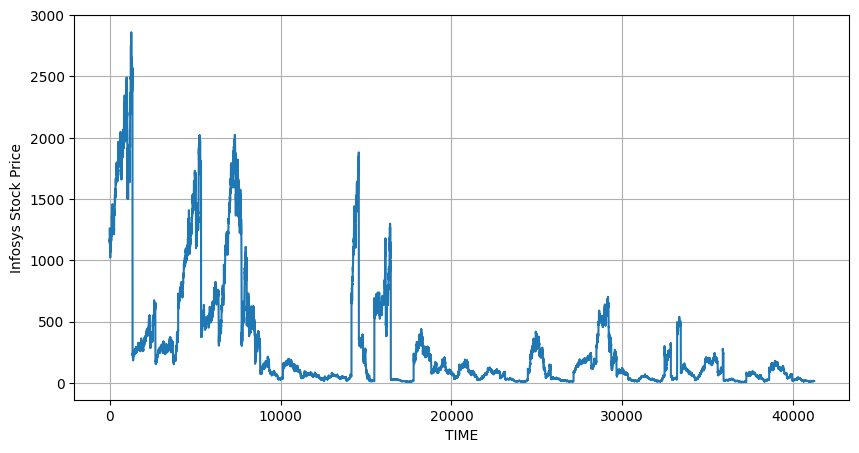

In [7]:
plt.figure(figsize=(10,5))
df['CLOSE'].plot()
plt.xlabel('TIME')
plt.ylabel('Infosys Stock Price')
plt.grid()

In [8]:
INFY_cycle , INFY_trend = hp_filter.hpfilter(df['CLOSE'], lamb= 129600)

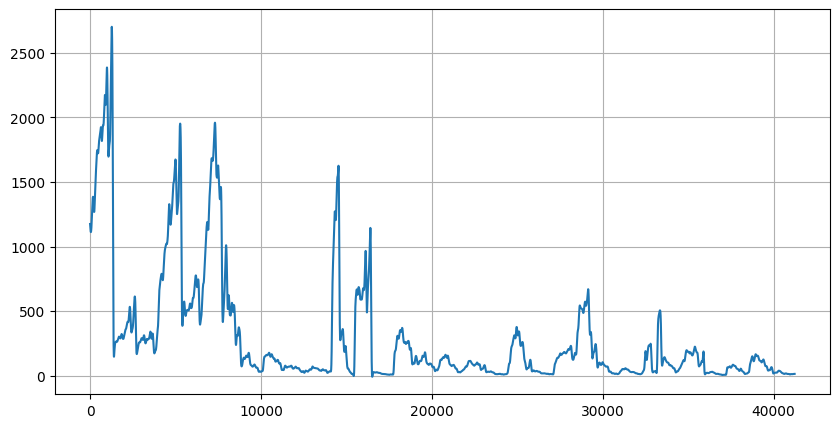

In [9]:
INFY_trend.plot(figsize=(10,5)).grid()

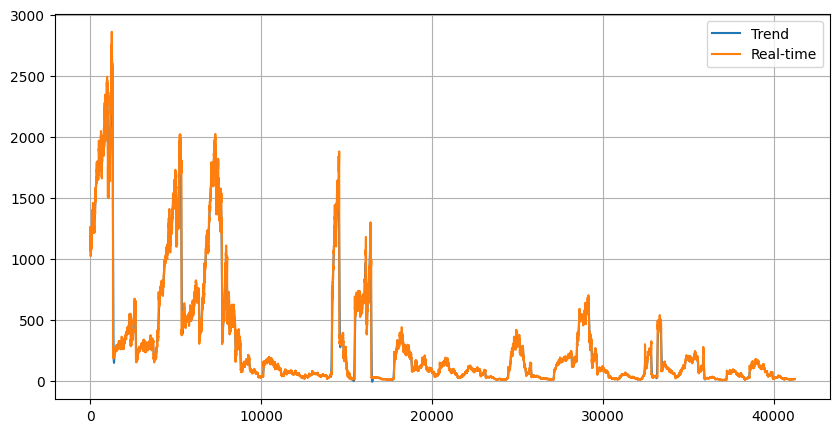

In [10]:
plt.figure(figsize=(10,5))
plt.plot(INFY_trend)
plt.plot(df['CLOSE'])
plt.legend(['Trend','Real-time'])
plt.grid()

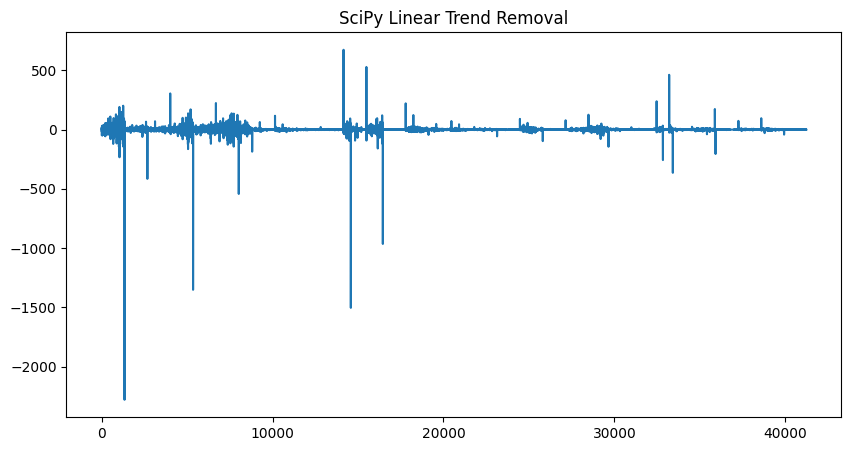

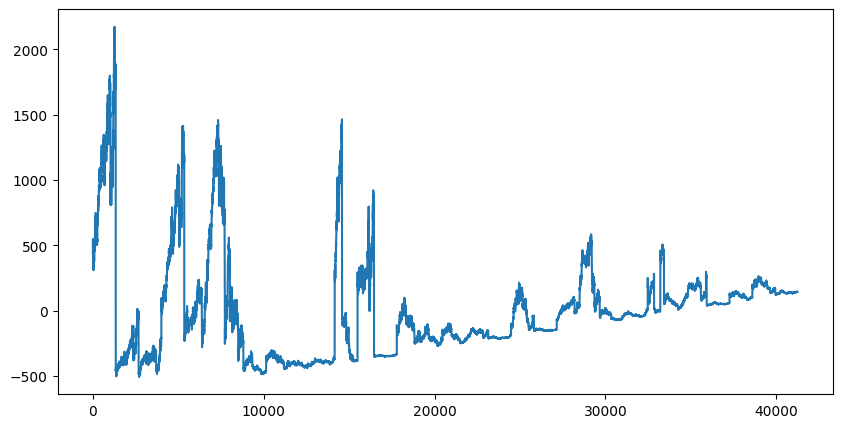

In [11]:
# Method-1 : Pandas Differencing

diff = df['CLOSE'].diff()
plt.figure(figsize=(10,5))
plt.title('Pandas Differencing')
plt.plot(diff)

# Method-2: SciPy Linear Detrending


from scipy.signal import detrend

detrended = detrend(df['CLOSE'].values)
plt.title('SciPy Linear Trend Removal')
plt.figure(figsize=(10,5))
plt.plot(detrended)

# Seasonality

Multiple Box plots


Autocorrelation plots

In [12]:
df['DATE'] = pd.to_datetime(df['DATE'])
df

,DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE
0,2016-01-01,HDFC,EQ,1263.75,1261.00,1266.90,1250.65,1257.80,1258.45,1258.39,676161,8.508751e+13,13230,308262,0.4559
1,2016-01-04,HDFC,EQ,1258.45,1250.00,1253.90,1212.05,1217.15,1216.70,1227.55,1995329,2.449371e+14,78529,1360507,0.6818
2,2016-01-05,HDFC,EQ,1216.70,1229.90,1233.45,1206.50,1208.15,1209.40,1219.50,2325929,2.836464e+14,109820,1644980,0.7072
3,2016-01-06,HDFC,EQ,1209.40,1209.60,1220.75,1202.40,1207.55,1209.30,1210.81,2746330,3.325286e+14,96546,2001431,0.7288
4,2016-01-07,HDFC,EQ,1209.30,1198.85,1203.55,1175.00,1176.35,1179.45,1186.35,1780298,2.112055e+14,60151,1172564,0.6586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41226,2021-05-24,DHANBANK,EQ,14.30,14.40,14.70,14.35,14.55,14.55,14.52,1020364,1.481694e+12,1323,745223,0.7304
41227,2021-05-25,DHANBANK,EQ,14.55,14.60,17.45,14.40,16.55,16.60,16.67,16401581,2.734927e+13,15379,4777890,0.2913
41228,2021-05-26,DHANBANK,EQ,16.60,16.75,16.75,15.80,15.95,15.95,16.06,2267386,3.642436e+12,4812,1223263,0.5395
41229,2021-05-27,DHANBANK,EQ,15.95,15.95,16.10,15.35,15.75,15.60,15.74,1411225,2.221628e+12,2820,904246,0.6408


In [13]:
df.shape

(41231, 15)

In [14]:
df['month'] = df['DATE'].dt.strftime('%b')
df['year'] = df['DATE'].dt.strftime('%Y')

In [15]:
df

,DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE,month,year
0,2016-01-01,HDFC,EQ,1263.75,1261.00,1266.90,1250.65,1257.80,1258.45,1258.39,676161,8.508751e+13,13230,308262,0.4559,Jan,2016
1,2016-01-04,HDFC,EQ,1258.45,1250.00,1253.90,1212.05,1217.15,1216.70,1227.55,1995329,2.449371e+14,78529,1360507,0.6818,Jan,2016
2,2016-01-05,HDFC,EQ,1216.70,1229.90,1233.45,1206.50,1208.15,1209.40,1219.50,2325929,2.836464e+14,109820,1644980,0.7072,Jan,2016
3,2016-01-06,HDFC,EQ,1209.40,1209.60,1220.75,1202.40,1207.55,1209.30,1210.81,2746330,3.325286e+14,96546,2001431,0.7288,Jan,2016
4,2016-01-07,HDFC,EQ,1209.30,1198.85,1203.55,1175.00,1176.35,1179.45,1186.35,1780298,2.112055e+14,60151,1172564,0.6586,Jan,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41226,2021-05-24,DHANBANK,EQ,14.30,14.40,14.70,14.35,14.55,14.55,14.52,1020364,1.481694e+12,1323,745223,0.7304,May,2021
41227,2021-05-25,DHANBANK,EQ,14.55,14.60,17.45,14.40,16.55,16.60,16.67,16401581,2.734927e+13,15379,4777890,0.2913,May,2021
41228,2021-05-26,DHANBANK,EQ,16.60,16.75,16.75,15.80,15.95,15.95,16.06,2267386,3.642436e+12,4812,1223263,0.5395,May,2021
41229,2021-05-27,DHANBANK,EQ,15.95,15.95,16.10,15.35,15.75,15.60,15.74,1411225,2.221628e+12,2820,904246,0.6408,May,2021


In [16]:
df['month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

Text(0.5, 1.0, 'Multi Month-wise Box Plot')

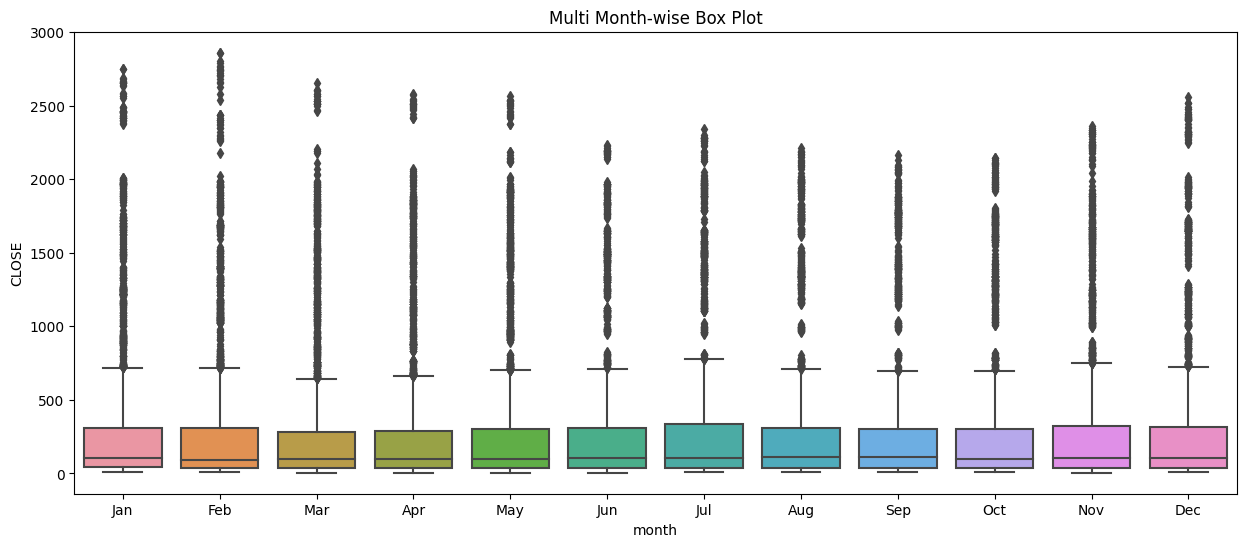

In [17]:
plt.figure(figsize=(15,6))
sns.boxplot(x='month', y='CLOSE', data=df).set_title("Multi Month-wise Box Plot")

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

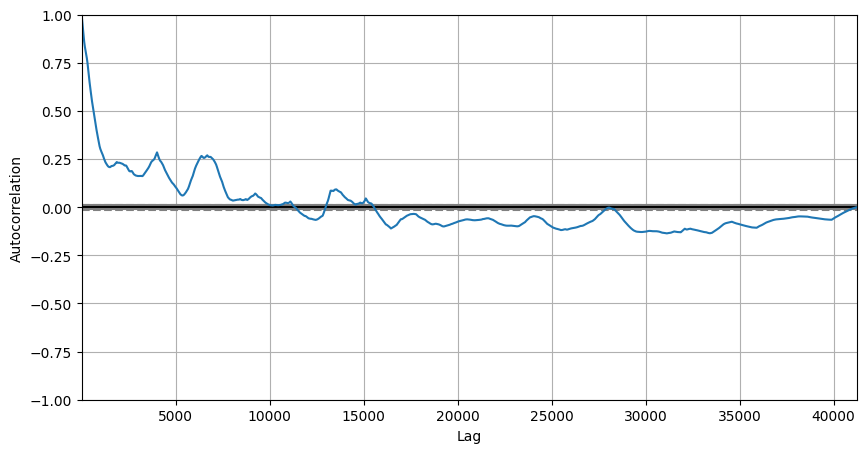

In [18]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10,5))
autocorrelation_plot(df['CLOSE'])

# Seasonal Decomposition

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(df['CLOSE'].values , model= 'multiplicative', period= 100)
deseason = df['CLOSE'] - result_mul.seasonal

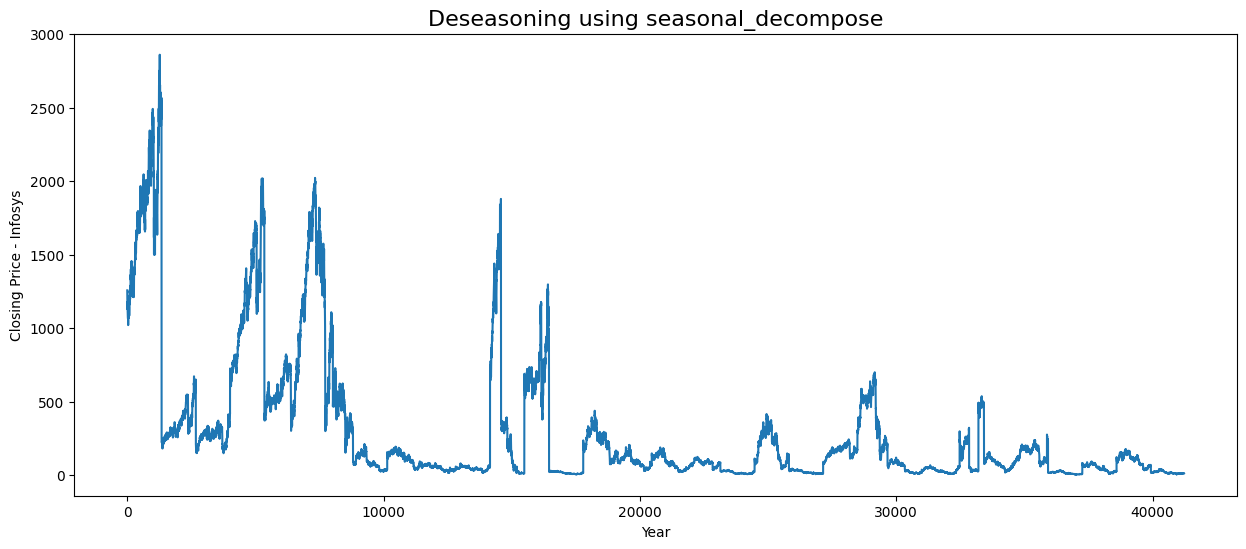

In [20]:
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16) 
plt.xlabel('Year')
plt.ylabel('Closing Price - Infosys')
plt.show()

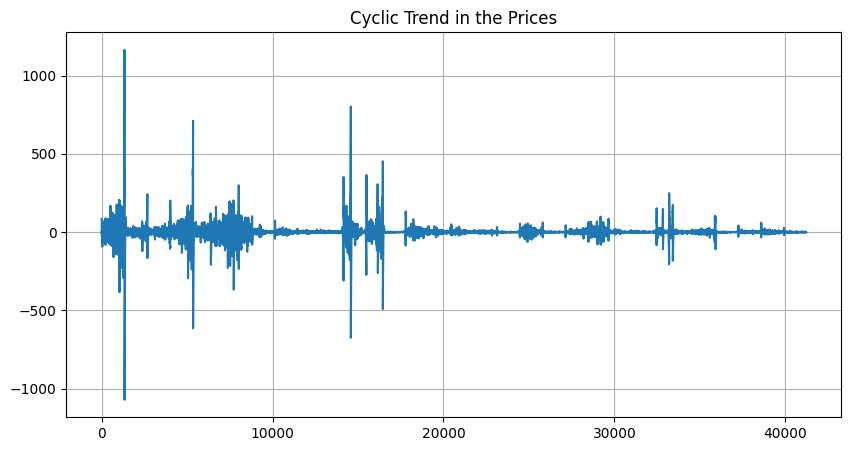

In [21]:
plt.figure(figsize=(10,5))
plt.title('Cyclic Trend in the Prices')
plt.plot(INFY_cycle)
plt.grid()

# Decomposition of Time-Series


In [22]:
result = seasonal_decompose(df['CLOSE'], model='additive', period= 100)

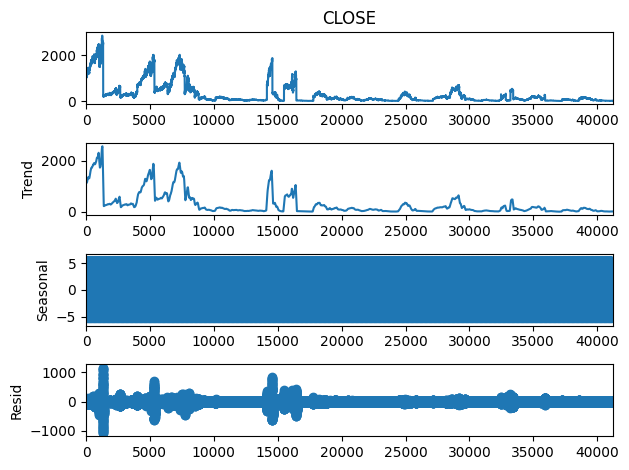

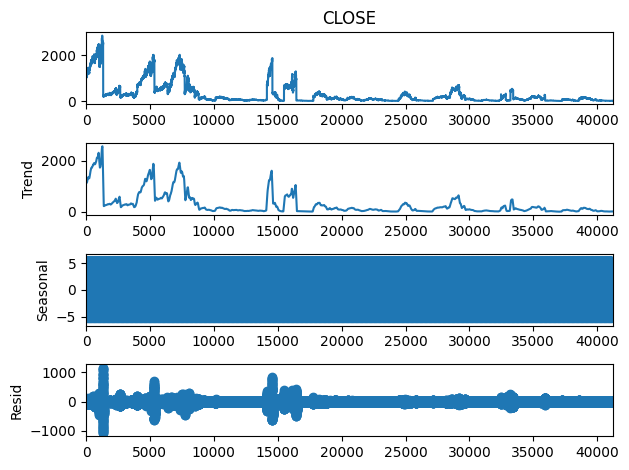

In [23]:
result.plot()

In [24]:
from pylab import rcParams

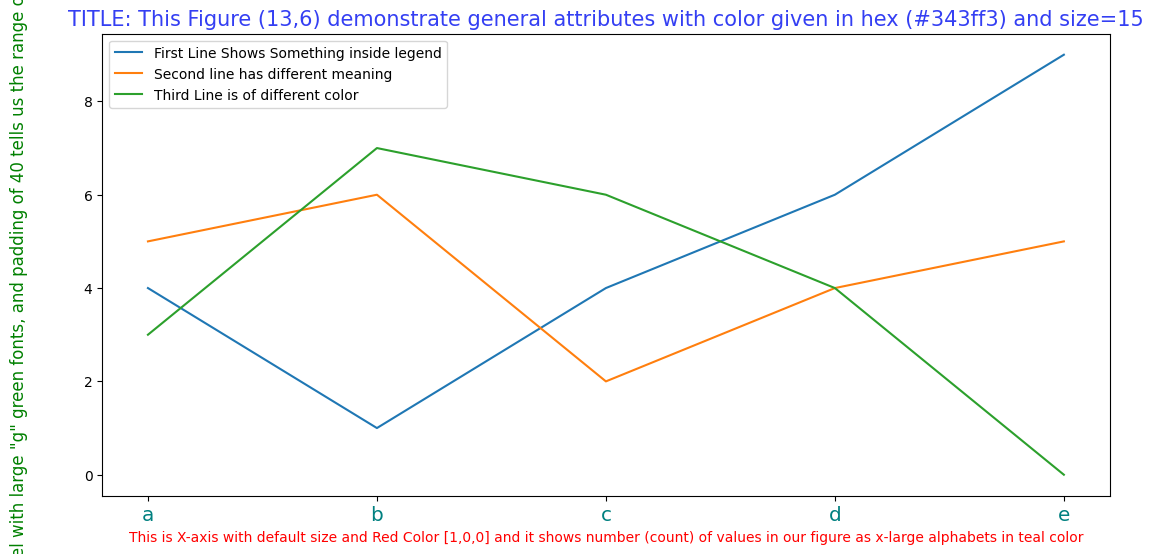

In [25]:
figure = plt.figure(figsize=(13,6))

plt.title('TITLE: This Figure (13,6) demonstrate general attributes with color given in hex (#343ff3) and size=15',color='#343ff3',size=15)

plot1 = plt.plot([4,1,4,6,9],label='First Line Shows Something inside legend')
plot2 = plt.plot([5,6,2,4,5], label='Second line has different meaning')
plot3 = plt.plot([3,7,6,4,0],label='Third Line is of different color')

plt.xlabel('This is X-axis with default size and Red Color [1,0,0] and it shows number (count) of values in our figure as x-large alphabets in teal color'
           ,color=[1,0,0])

plt.ylabel('Y-Label with large "g" green fonts, and padding of 40 tells us the range of values',
           color='g',labelpad=40, size='large')

plt.xticks([0,1,2,3,4],['a','b','c','d','e'],color='teal',size='x-large')

plt.legend(loc='best') # you can do a lot more with legend
# plt.grid() # show a grid in background to show major, minor or both lines and whether for x, y or both axis
# with seaborn style grid is true automatically
plt.show()

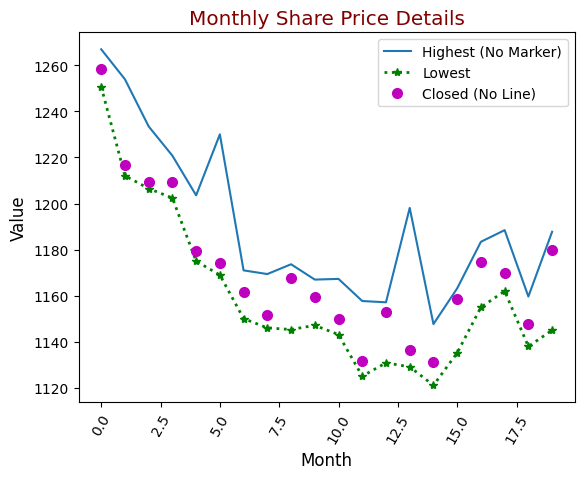

In [26]:
sample_stock = df.iloc[:20,:] # First 20 months stocks Prices details only to show clearly

plt.plot(sample_stock['HIGH'],label='Highest (No Marker)') # default attributes
plt.plot(sample_stock['LOW'],label='Lowest',ls='dotted',color='green',lw=2,marker='*') 
plt.plot(sample_stock['CLOSE'],label='Closed (No Line)',linestyle='none',marker='o',color='m',markersize=7)

plt.xlabel('Month',size='large')
plt.ylabel('Value',size='large')
plt.xticks(rotation=60)
plt.title('Monthly Share Price Details',size='x-large',color='maroon')

plt.legend()
plt.show()